In [10]:
import libs
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from netCDF4 import Dataset
import time
import re

s1 and ut

In [6]:
import pandas as pd
import numpy as np

# 初始化数据
data = [1, 2, np.nan, np.nan, 5, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
        20, 21, np.nan, 22]
series = pd.Series(data)

# 找出所有NaN的位置
is_nan = series.isna()

# 通过cumsum()创建分组，连续的NaN会有相同的组号
grouped = is_nan.ne(is_nan.shift()).cumsum()

# 统计每组NaN的数量
nan_counts = is_nan.groupby(grouped).sum()

# 找出连续NaN数量超过10的组
large_nan_groups = nan_counts[nan_counts > 10].index

# 标记需要保留的数据
mask = ~grouped.isin(large_nan_groups) | ~is_nan

# 应用mask，删除连续NaN超过10的部分
filtered_series = series[mask]

# 输出处理后的Series
print("Filtered Series:")
print(filtered_series)

# 计算索引的不连续处
diffs = filtered_series.index.to_series().diff() > 1
breaks = filtered_series.index[diffs].tolist()  # 获得所有不连续索引的位置

# 添加起始和结束索引以确保完整分割
if 0 not in breaks:
    breaks.insert(0, 0)
if filtered_series.index[-1] not in breaks:
    breaks.append(filtered_series.index[-1] + 1)  # 添加最后一个索引加一，以确保包括最后一个元素

# 根据不连续的索引分割Series
parts = [filtered_series.loc[breaks[i]:breaks[i+1]-1] for i in range(len(breaks) - 1)]

# 输出分割后的部分
for i, part in enumerate(parts):
    print(f"Part {i+1}:")
    print(part)

Filtered Series:
0      1.0
1      2.0
2      NaN
3      NaN
4      5.0
16    20.0
17    21.0
18     NaN
19    22.0
dtype: float64
Part 1:
0    1.0
1    2.0
2    NaN
3    NaN
4    5.0
dtype: float64
Part 2:
16    20.0
17    21.0
18     NaN
19    22.0
dtype: float64


In [5]:
import libs_cleo

file_path = r"G:\0_postgraduate\DMSP\data\cdf\dmsp-f18_ssies-3_thermal-plasma_201101010021_v01.cdf"
file_cdf = libs_cleo.CDFFile(file_path)
parts = file_cdf.return_vx_parts(max_nan_len=60)

In [2]:
import pandas as pd
import numpy as np

# 初始化数据
data = [1, 2, np.nan, np.nan, 5, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
        20, 21, np.nan, 22]
series = pd.Series(data)

# 计算索引的不连续处
diffs = series.index.to_series().diff() > 1
breaks = series.index[diffs].tolist()  # 获得所有不连续索引的位置

# 添加起始和结束索引以确保完整分割
if 0 not in breaks:
    breaks.insert(0, 0)
if series.index[-1] not in breaks:
    breaks.append(series.index[-1] + 1)  # 添加最后一个索引加一，以确保包括最后一个元素

# 根据不连续的索引分割Series
parts = [series[breaks[i]:breaks[i+1]] for i in range(len(breaks) - 1)]

# 输出分割后的部分
for i, part in enumerate(parts):
    print(f"Part {i+1}:")
    print(part)


Part 1:
0      1.0
1      2.0
2      NaN
3      NaN
4      5.0
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16    20.0
17    21.0
18     NaN
19    22.0
dtype: float64


In [11]:
s1 = libs.File(r"G:\0_postgraduate\DMSP\data\2011\15s1\dms_20110101_15s1.001.nc")
ut = libs.File(r"G:\0_postgraduate\DMSP\data\2011\ut\dms_ut_20110101_15.002.nc")
data_s1 = s1.original_data
data_details_s1 = s1.data_details

data_ut = ut.original_data
data_details_ut = ut.data_details

<Axes: >

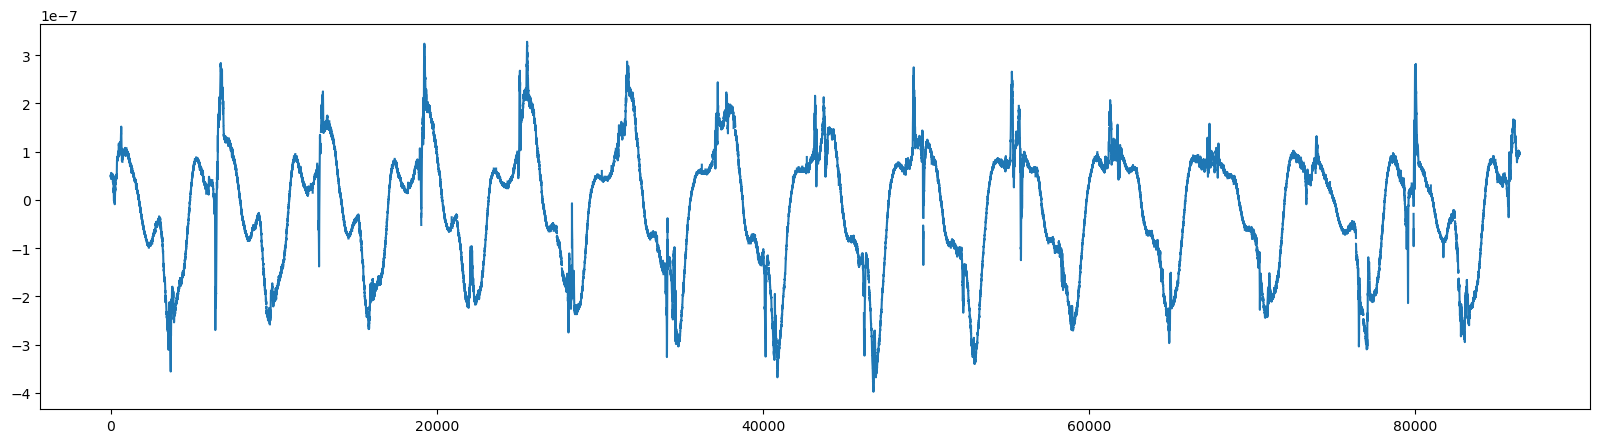

In [12]:
data_s1['diff_b_for'].plot(figsize=(20,5))

<Axes: >

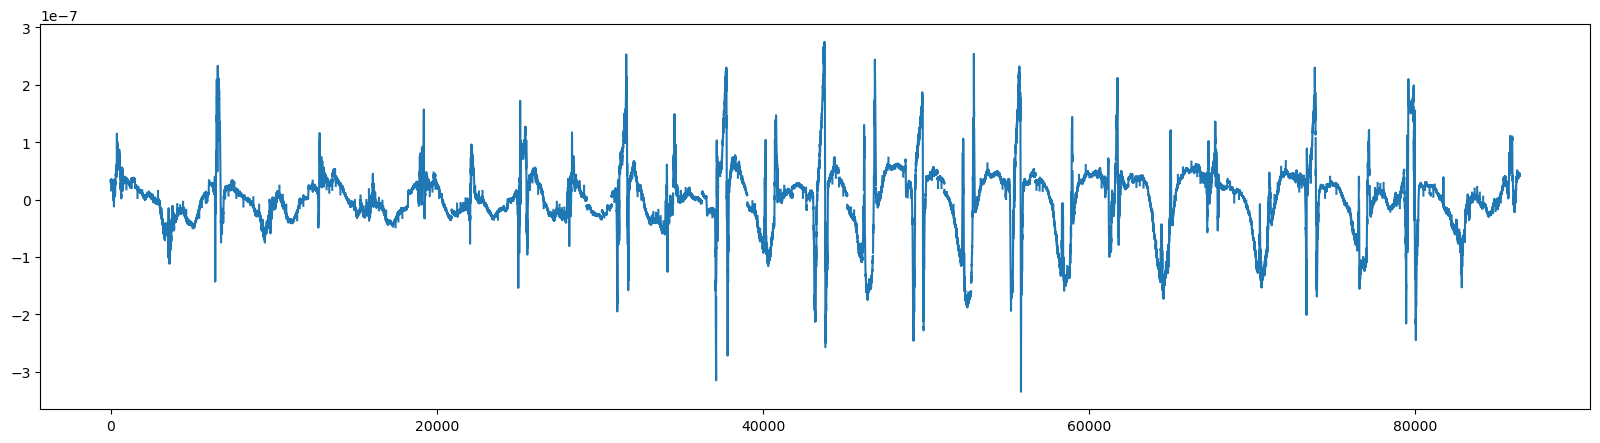

In [15]:
data_s1['diff_b_perp'].plot(figsize=(20,5))

<Axes: >

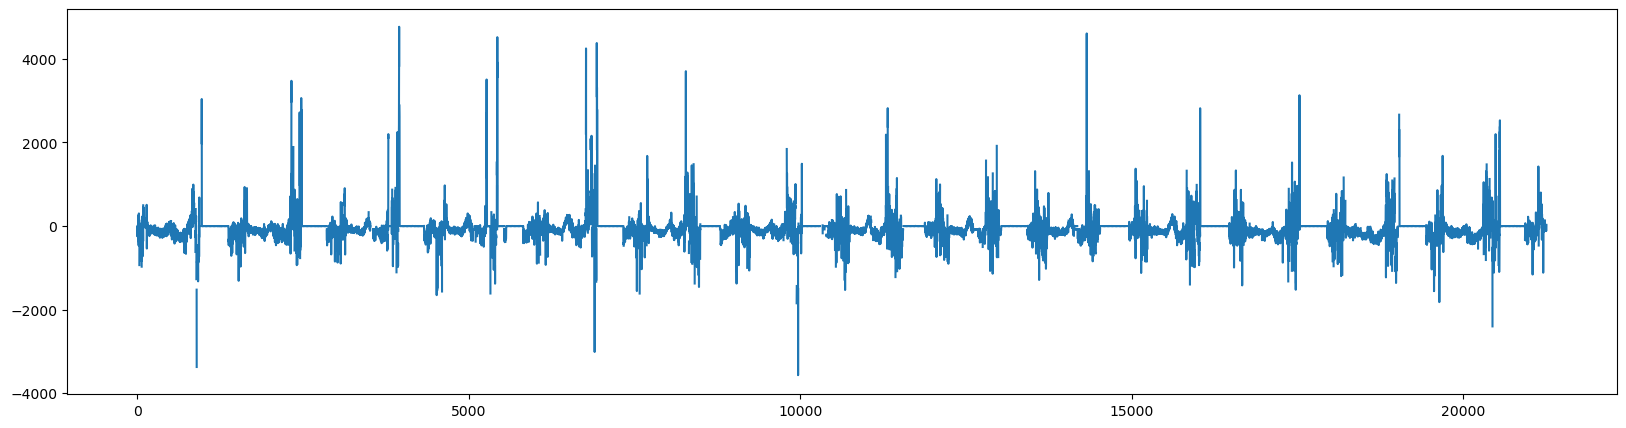

In [13]:
data_ut['ion_v_sat_for'].plot(figsize=(20,5))

<Axes: >

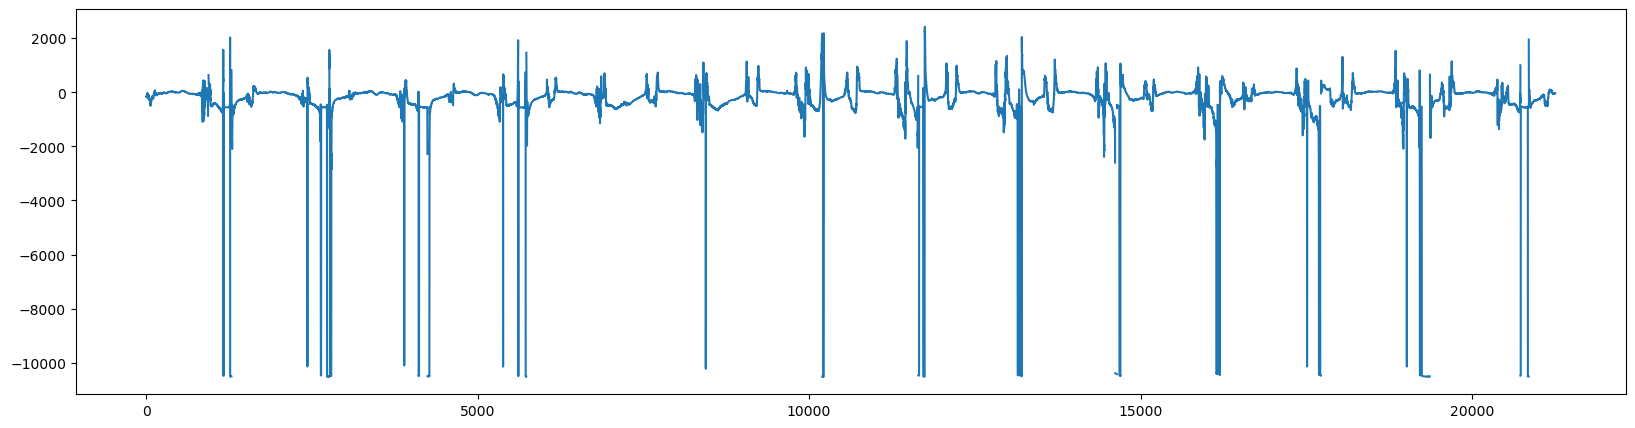

In [14]:
data_ut['ion_v_sat_left'].plot(figsize=(20,5))

In [19]:
timestamps = data_ut['timestamps']
# 计算相邻时间戳之间的差异
differences = np.diff(timestamps)

# 检查所有差异是否都为4
is_interval_four = np.all(differences == 4)

print("Is every interval exactly 4? ", is_interval_four)

# 找到差异不为4的索引
indices_not_four = np.where(differences != 4)[0]

# 返回这些索引。因为diff计算的是i和i+1之间的差值，所以返回的索引是第一个元素的位置
print("Indices where the interval is not exactly 4:", indices_not_four)

Is every interval exactly 4?  False
Indices where the interval is not exactly 4: [  526   938   939   940   941   942   943   944   945  1221  1256  1257
  1258  1261  1262  1265  1266  1269  1274  1275  1276  1283  1286  1287
  1292  1996  2430  2431  2432  2433  2434  2435  2686  2691  2694  2697
  2702  2711  2714  2715  2718  2719  2720  2725  2730  2731  2734  2735
  2740  2743  2748  2749  2752  2755  2758  2763  2764  2769  2772  2775
  2780  3476  3890  3891  3892  3893  3899  3904  3912  4187  4188  4199
  4202  4203  4210  4211  4212  4219  4220  4223  4228  4233  4234  4235
  4240  4241  4248  4249  4256  4257  4258  4259  4260  4267  4268  4958
  5286  5310  5324  5383  5384  5385  5387  5388  5392  6459  6783  6794
  6813  6835  6910  7960  8293  8455  8456  9483  9668  9669  9794 11007
 11297 11324 11717 12515 12775 12776 12809 12836 13191 14033 15560 15892
 15895 16164 16361 16370 16379 16382 16385 16386 16387 17081 17405 17407
 17509 17512 17518 17520 17860 17861 17864 

In [20]:
timestamps = data_s1['timestamps']
# 计算相邻时间戳之间的差异
differences = np.diff(timestamps)

# 检查所有差异是否都为4
is_interval_four = np.all(differences == 1)

print("Is every interval exactly 1? ", is_interval_four)

# 找到差异不为4的索引
indices_not_one = np.where(differences != 1)[0]

# 返回这些索引。因为diff计算的是i和i+1之间的差值，所以返回的索引是第一个元素的位置
print("Indices where the interval is not exactly 1:", indices_not_one)

Is every interval exactly 1?  True
Indices where the interval is not exactly 1: []
